In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.stats.api as sms
import statsmodels.api as sm
from sklearn import set_config
import pickle
import warnings

warnings.filterwarnings('ignore')
set_config(display="diagram")

In [2]:
df = pd.read_csv('true_car_listings.csv')
df.sample(5)

,Price,Year,Mileage,City,State,Vin,Make,Model
420789,25900,2014,31650,Nashville,TN,5FNRL5H65EB133303,Honda,OdysseyEX-L
542569,21988,2017,15648,Richmond,VA,KNDMB5C15H6226928,Kia,SedonaLX
794942,21990,2013,61946,Morristown,TN,5TDBK3EH2DS219676,Toyota,Highlander4X4
410193,12349,2011,107453,Woodstock,GA,5J6RE4H78BL038587,Honda,CR-V4WD
582793,7995,2012,40100,Naugatuck,CT,JM1BL1UG3C1551650,Mazda,Mazda34dr


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 852122 entries, 0 to 852121
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    852122 non-null  int64 
 1   Year     852122 non-null  int64 
 2   Mileage  852122 non-null  int64 
 3   City     852122 non-null  object
 4   State    852122 non-null  object
 5   Vin      852122 non-null  object
 6   Make     852122 non-null  object
 7   Model    852122 non-null  object
dtypes: int64(3), object(5)
memory usage: 52.0+ MB


In [4]:
len(df)-len(df.drop_duplicates())

30

In [5]:
df = df.drop_duplicates()

In [6]:
df_clean = df.drop(columns=['City','State','Vin','Make'])

In [7]:
y = df_clean['Price']
X = df_clean.drop(columns='Price')

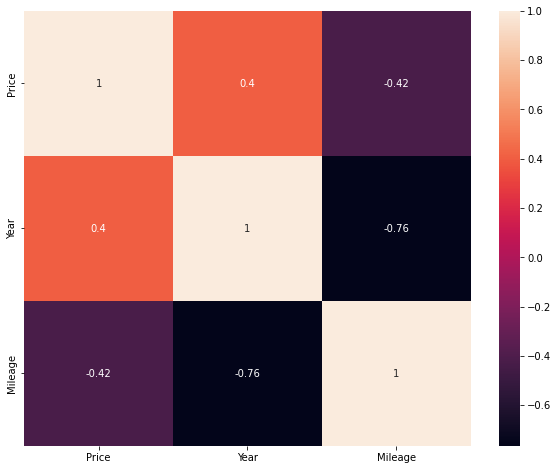

In [8]:
df_heatmap = df_clean.drop(columns='Model').corr()

plt.figure(figsize=(10,8))
sns.heatmap(df_heatmap, annot=True);

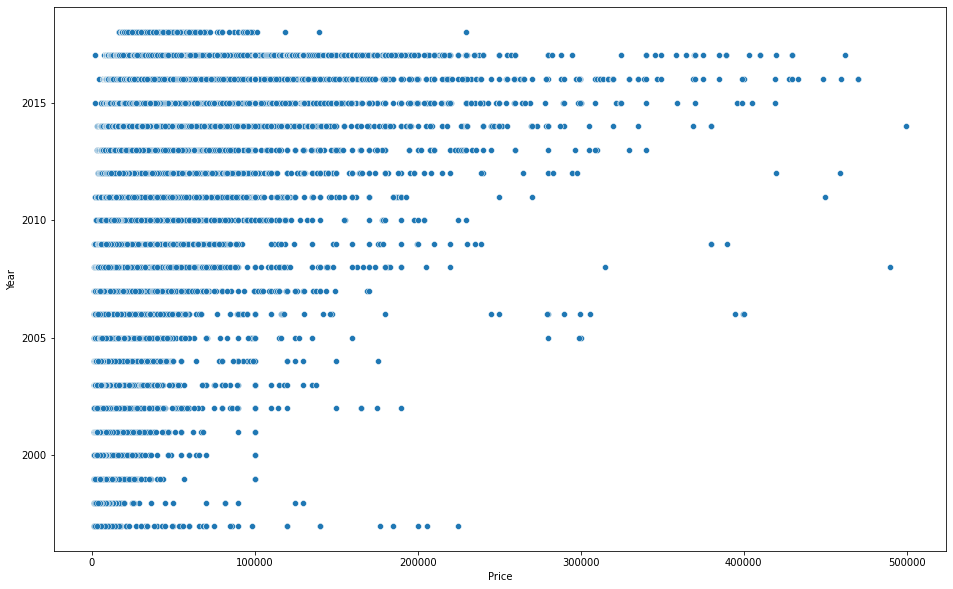

In [9]:
plt.figure(figsize=(16,10))
sns.scatterplot(df_clean['Price'], df_clean['Year']);

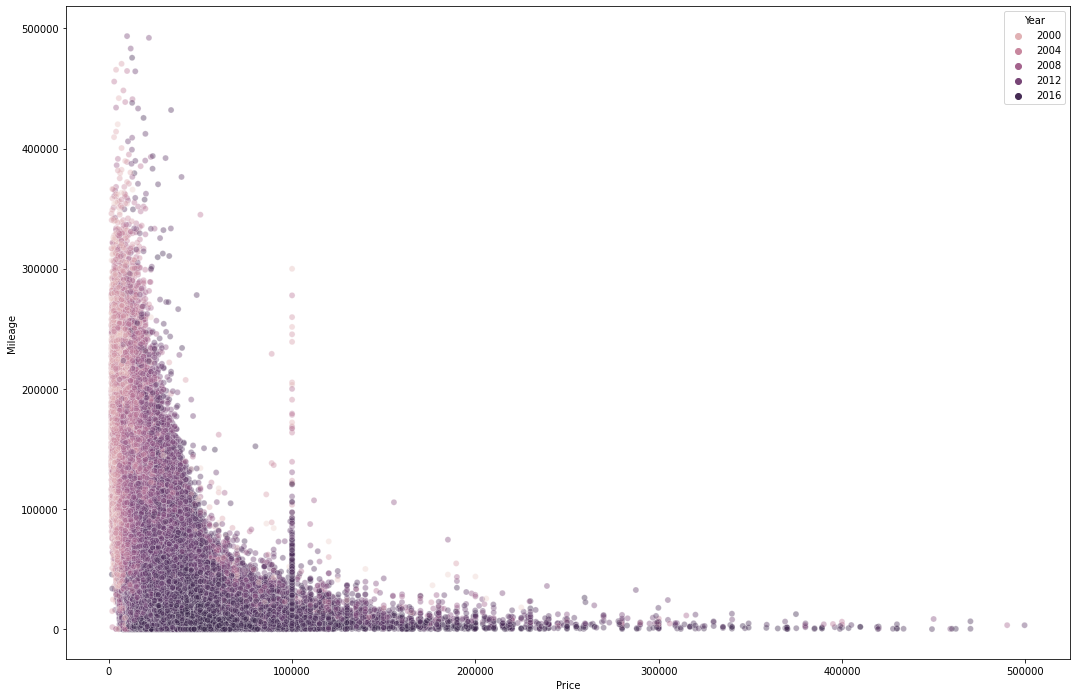

In [10]:
df_scat = df_clean[df_clean['Mileage']<500000]

plt.figure(figsize=(18,12))
sns.scatterplot(df_scat['Price'], df_scat['Mileage'], hue=df_clean['Year'], alpha=0.4);

In [11]:
Q1 = df_clean["Mileage"].quantile(0.05)
Q3 = df_clean["Mileage"].quantile(0.95)
IQR = Q3 - Q1
df_clean_2 = df_clean[~((df_clean["Mileage"]<(Q1-1.5*IQR)) | (df_clean["Mileage"] > (Q3 + 1.5*IQR)))]

In [12]:
df_clean.shape, df_clean_2.shape

((852092, 4), (851882, 4))

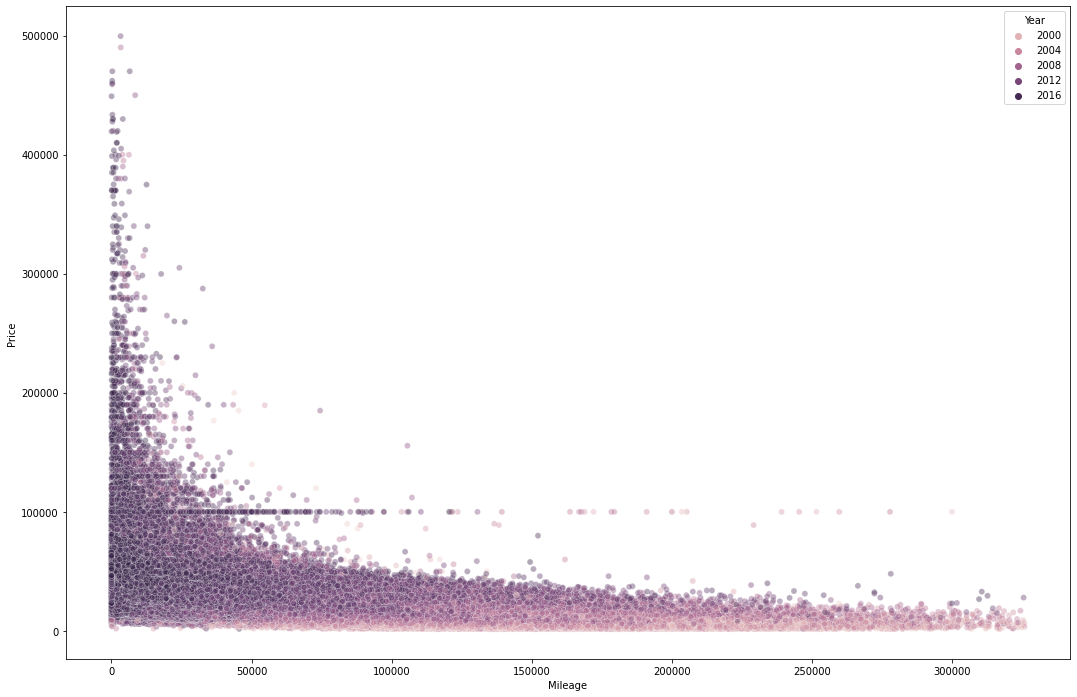

In [13]:
df_scat = df_clean_2

plt.figure(figsize=(18,12))
sns.scatterplot(df_scat['Mileage'], df_scat['Price'], hue=df_clean['Year'], alpha=0.4);

In [14]:
df_test = pd.DataFrame(df_clean['Model'].value_counts().sort_values(ascending=False))

In [15]:
df_test[df_test['Model'] > 999].sum()

Model    558515
dtype: int64

In [16]:
models = df_test[df_test['Model'] > 999].index.tolist()
len(models)

215

In [17]:
df_clean_final = df_clean_2[df_clean_2['Model'].isin(models)]

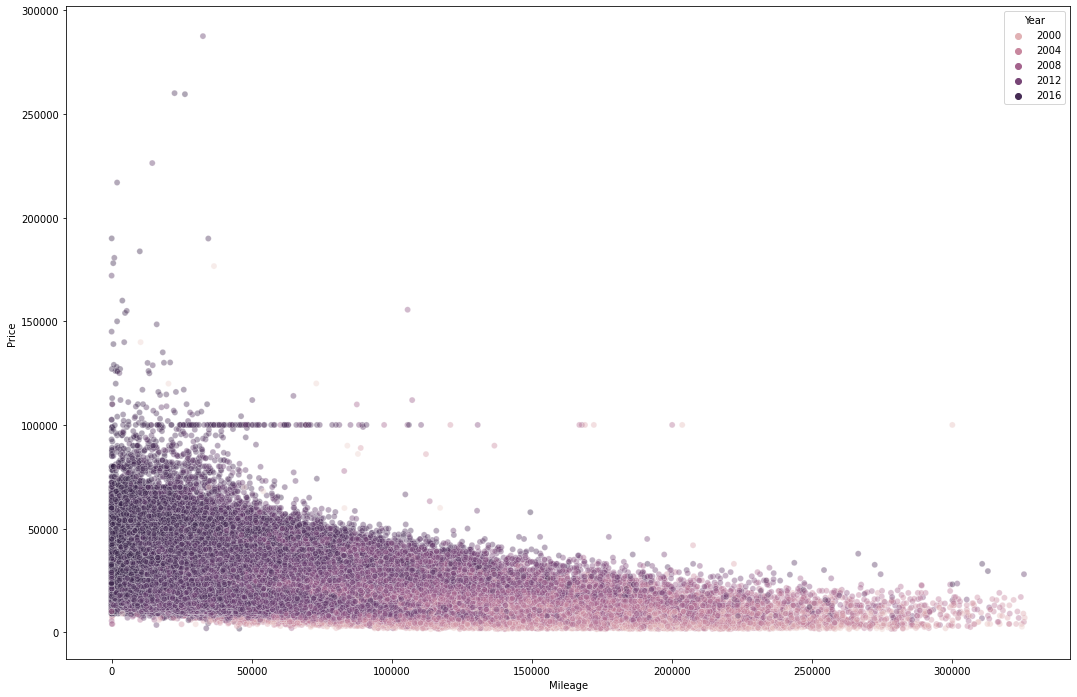

In [18]:
df_scat = df_clean_final

plt.figure(figsize=(18,12))
sns.scatterplot(df_scat['Mileage'], df_scat['Price'], hue=df_clean['Year'], alpha=0.4);

In [19]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import patsy
import patsylearn

In [21]:
y = df_clean_final['Price']
X = df_clean_final.drop(columns='Price')

In [22]:
formula1 = 'Mileage * Year * Model'

In [23]:
patsify_F1 = patsylearn.PatsyTransformer(formula1)

In [24]:
X_F1 = patsify_F1.fit_transform(X)

In [25]:
X_F1.shape

(558375, 860)

In [26]:
mms = MinMaxScaler()

In [27]:
X_final = pd.DataFrame(mms.fit_transform(X_F1))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3)

In [29]:
#model = LinearRegression().fit(X_train, y_train)

In [30]:
#model.score(X_test,y_test)

In [31]:
param = {'alpha' : [0.0001],
         'eta0': np.linspace(0.01, 0.05, 2)}

In [32]:
grid = GridSearchCV(SGDRegressor(), param, scoring="r2")

In [33]:
grid.fit(X_train, y_train)

: 

: 

In [ ]:
display(grid.best_params_)
display(grid.best_score_)
display(grid.best_estimator_)